In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from improc.io import DCAccessor
DCAccessor.register()
from functools import partial
import seaborn

# Load parsed collection and extracted features

In [18]:
basedir = '/tungstenfs/scratch/gliberal/Users/zinnmari/GastruloidGeneral/200615MZ001BBB_Sox2BraTC/workflow_out_20210126-141728/'
df = pd.read_hdf(os.path.join(basedir, 'output_collection.h5'))
spx_props = pd.read_hdf(os.path.join(basedir, 'spx_props.h5'))

print('data collection')
display(df)

print('super pixels features')
display(spx_props)

data collection


pattern  \
platedir          subdir          plate_row plate_column channel zslice                                                      
200615MZ001BBB120 CENTER_SURROUND A         1            1       31      {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                            3            1       32      {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                            4            1       29      {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                            5            1       35      {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                            6            1       41      {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
...                                                                                                                    ...   
200615MZ001BBB96  TIF_OVR_MIP     P         23           2       1       {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                                         3       1       {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                            24           1       1       {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                                         2       1       {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   
                                                         3       1       {basedir}/{platedir}/{subdir}/{date:06d}MZ{f1:...   

                                                                                                                   basedir  \
platedir          subdir          plate_row plate_column channel zslice                                                      
200615MZ001BBB120 CENTER_SURROUND A         1            1       31      /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                            3            1       32      /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                            4            1       29      /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                            5            1       35      /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                            6            1       41      /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
...                                                                                                                    ...   
200615MZ001BBB96  TIF_OVR_MIP     P         23           2       1       /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                                         3       1       /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                            24           1       1       /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                                         2       1       /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   
                                                         3       1       /tungstenfs/scratch/gliberal/Users/zinnmari/Ga...   

                                                                           date  \
platedir          subdir          plate_row plate_column channel zslice           
200615MZ001BBB120 CENTER_SURROUND A         1            1       31      200615   
                                            3            1       32      200615   
                                            4            1       29      200615   
                                            5            1       35      200615   
                                            6            1       41      200615   
...                                                                         ...   
200615MZ001BBB96  TIF_OVR_MIP     P         23           2       1       200615   
                                                         3       1       200615   
       

super pixels features


spx_center_phi  \
platedir          plate_row plate_column timepoint object_id                   
200615MZ001BBB120 A         1            120       1                2.929932   
                                                   2                2.966175   
                                                   3                2.805456   
                                                   4                2.861553   
                                                   5               -3.111845   
...                                                                      ...   
200615MZ001BBB96  P         24           94        1131             0.360150   
                                                   1132             0.494212   
                                                   1133             0.600673   
                                                   1134             0.529832   
                                                   1135             0.644053   

                                                              spx_center_radius  \
platedir          plate_row plate_column timepoint object_id                      
200615MZ001BBB120 A         1            120       1                 376.924316   
                                                   2                 366.502533   
                                                   3                 387.678528   
                                                   4                 375.053345   
                                                   5                 358.720245   
...                                                                         ...   
200615MZ001BBB96  P         24           94        1131              271.523926   
                                                   1132              295.546448   
                                                   1133              317.284424   
                                                   1134              309.820892   
                                                   1135              333.049011   

                                                              spx_center_x  \
platedir          plate_row plate_column timepoint object_id                 
200615MZ001BBB120 A         1            120       1           -368.512665   
                                                   2           -360.878052   
                                                   3           -365.982422   
                                                   4           -360.442902   
                                                   5           -358.561554   
...                                                                    ...   
200615MZ001BBB96  P         24           94        1131         254.104080   
                                                   1132         260.182190   
                                                   1133         261.745514   
                                                   1134         267.341949   
                                                   1135         266.328796   

                                                              spx_center_y  \
platedir          plate_row plate_column timepoint object_id                 
200615MZ001BBB120 A         1            120       1             79.185570   
                                                   2             63.961884   
                                                   3            127.872986   
                                                   4            103.662468   
                                                   5            -10.669634   
...                                                                    ...   
200615MZ001BBB96  P         24           94        1131          95.688896   
                                                   1132         140.188965   
                                                   1133         179.328461   
                                                   1134         156.

# Superpixels

### Utility functions to investigate superpixel features.

In [3]:
def normalize_coordinates(groupdf: pd.DataFrame, 
                          rad_col='spx_center_radius', 
                          coord_cols=['spx_center_x', 'spx_center_y']):
    '''scales cartesian and polar coordinates by maximum radius.
    '''
    max_radius = groupdf.spx_center_radius.max()
    for col in  coord_cols + [rad_col,]:
        groupdf[col] = groupdf[col] / max_radius
    return groupdf

def calculate_mean_angle(angles: np.ndarray):
    '''just an average. Does not consider wrapping at +/-pi.
    Consider using calculate_angle_of_center for a more robust estimate.
    
    '''
    return angles.mean()

def calculate_angle_of_center(coords: np.ndarray):
    '''
    '''
    center = coords.mean(axis=0)
    assert len(center) == 2
    assert center.ndim == 1
    
    def cartesian_to_angle(xy):
        x, y = xy
        return np.arctan2(y, x)
    
    return cartesian_to_angle(center)


def rotate_coords(xy: np.ndarray, angle: float) -> np.ndarray:
    '''build a rotation matrix and take the dot product.
    angle is expected to be in rad.'''
    assert xy.ndim == 2
    assert xy.shape[1] == 2
    x, y = xy
    c, s = np.cos(angle), np.sin(angle)
    j = np.matrix([[c, -s], [s, c]])
    transformed = np.dot(j, xy.T).T
    return transformed

def normalize_to_angle(groupdf: pd.DataFrame,
                       angle: float,
                       angle_col='spx_center_phi', 
                       coord_cols=['spx_center_x', 'spx_center_y']):
    '''rotates all superpixels by the given angle and wraps again to [-pi, pi).
    '''
    # mean_angle = calculate_angle_of_center(groupdf[coord_cols])
    groupdf[angle_col+'_original'] = groupdf[angle_col]
    groupdf[angle_col] = (groupdf[angle_col] - angle + np.pi) % (2 * np.pi) - np.pi

    groupdf[[key+'_original' for key in coord_cols]] = groupdf[coord_cols]
    groupdf[coord_cols] = rotate_coords(groupdf[coord_cols], -angle)
    return groupdf

def topk(groupdf: pd.DataFrame, frac: float, col: str):
    '''
    '''
    groupdf = normalize_coordinates(groupdf)
    num_largest = int(frac * len(groupdf))
    groupdf = groupdf.nlargest(n=num_largest, columns=col)
    return normalize_to_angle(groupdf)

## Orientation of individual objects to a normalized coordinate system
This is applied to the entire(!) dataframe. A selector can be inserted to estimate the "normal angle".

In [4]:
class OrientationNormalizer:
    
    def __init__(self, selector=None, 
                 angle_col='spx_center_phi',
                 rad_col='spx_center_radius',
                 coord_cols=['spx_center_x', 'spx_center_y']):
        '''
        selector has to be a callable that takes groupdf 
        as single argument.
        angle_col and coord_cols are the column names identifying
        polar angle and cartesian coordinates in the dataframes.
        '''
        self.selector = selector
        self.coord_cols = coord_cols
        self.angle_col = angle_col
        self.rad_col = rad_col
    
    
    def estimate_normal_angle(self, groupdf):
        '''estimate the angle to normalize to for the given group.
        '''
        if self.selector is not None:
            selected = self.selector(groupdf)
        else:
            selected = groupdf
        return calculate_angle_of_center(selected[self.coord_cols])
    
    def apply(self, groupdf, **kwargs):
        '''normalizes to unit radius and rotates every entry in groupdf to 
        a "normal" angle.
        '''
        groupdf = normalize_coordinates(groupdf, 
                                        rad_col=self.rad_col, 
                                        coord_cols=self.coord_cols)
        angle = self.estimate_normal_angle(groupdf)
        return normalize_to_angle(groupdf, angle, 
                                  angle_col=self.angle_col,
                                  coord_cols=self.coord_cols)
    
    def apply_on_all(self, dataframe, groupkey):
        '''applies normalization on all groups.
        '''
        return dataframe.groupby(groupkey).apply(self.apply)

## Selector functions
These are used to select a subset of superpixels per group. We are using them 1) to estimate the angle for re-orienting the individual objects and 2) plotting only "active" spx based on a certain channel.

In [15]:
def select_topk(groupdf: pd.DataFrame, frac: float, col: str):
    '''selects the relative top superpixels from the channel specified by col.
    
    frac is expected to be within (0, 1).
    '''
    assert 0 < frac < 1
    num_largest = int(frac * len(groupdf))
    return groupdf.nlargest(n=num_largest, columns=col)


def apply_on_all(data, func, groupkeys=['timepoint', 'plate_column', 'plate_row', 'platedir']):
    return data.groupby(groupkeys).apply(func).drop(columns=groupkeys).reset_index()
    

# Display superpixels in Hex plots 

## Background substraction

In [19]:
stainings = list(spx_props)
remove_col = ['spx_center_phi', 'spx_center_radius', 'spx_center_x', 'spx_center_y']
stainings = [staining for staining in stainings if staining not in remove_col] 
stainings

['spx_ch1_mean', 'spx_ch2_mean', 'spx_ch3_mean']

In [20]:
for staining in stainings:
    spx_props[staining] = np.where(spx_props[staining] < 120, 0, spx_props[staining])

## Normalise by DAPI

In [21]:
for staining in stainings:
    norm_name = staining + '_norm'
    spx_props[norm_name] = spx_props[staining].div(spx_props.spx_ch1_mean, axis=0) 

## How many superpixels are there over the different timepoints?

This is important to check to make sure the distributions later on are not just dominated by a few very large gastruloids.

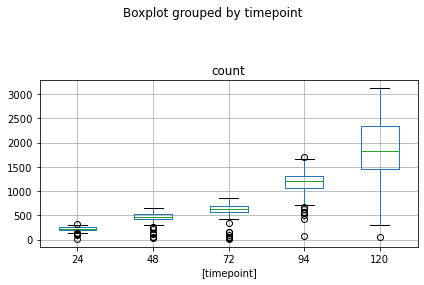

In [22]:
key = 'object_id'
spx_props.reset_index(key).groupby(['timepoint', 'plate_column', 'plate_row']).agg({key: 'count'}).rename(columns={key : 'count'}).boxplot(by='timepoint')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Where are the top-k% superpixels?

NOTE

* Center of mass of the overall mask becomes (0, 0) coordinate.
* Distances are normalized by the distance from the origin of the farthest superpixel in each object.

* these distributions show *all topk superpixels*. That means larger objects contribute more points. -> Verify that there arent a few very large gastruloids that dominate the plot.
* The hexbin plots show frequency of location in the topk, **not intensity**.
* There seems to be a localization over the time course also for DAPI and BRA!? -> Verify whether this makes sense and consider relative comparisons between channels.


OPEN

* Check correlation of channel intensities before topk
* Check colocalization of topk across channels (before rotation to mean angle...)

First you need to define which staining should be used for orientation. We usually use Sox2.

In [24]:
FRAC = 0.25
ORIENT_COL = 'spx_ch2_mean'  #stainings used to orient the plot (i.e. Sox2)

normalizer = OrientationNormalizer(
    
    selector=partial(select_topk,
                     frac=FRAC,
                     col=ORIENT_COL)   
)

# Run the normalizer on all groups. groupkey has to define a partition such that each 
# of the resulting groups is comprised of spx of only one gastruloid.
oriented_features = normalizer.apply_on_all(
    spx_props,
    groupkey=['timepoint', 'plate_column', 'plate_row', 'platedir'])
oriented_features

spx_center_phi  \
platedir          plate_row plate_column timepoint object_id                   
200615MZ001BBB120 A         1            120       1                1.079348   
                                                   2                1.115591   
                                                   3                0.954871   
                                                   4                1.010968   
                                                   5                1.320756   
...                                                                      ...   
200615MZ001BBB96  P         24           94        1131            -0.763907   
                                                   1132            -0.629845   
                                                   1133            -0.523384   
                                                   1134            -0.594225   
                                                   1135            -0.480003   

                                                              spx_center_radius  \
platedir          plate_row plate_column timepoint object_id                      
200615MZ001BBB120 A         1            120       1                   0.822152   
                                                   2                   0.799420   
                                                   3                   0.845609   
                                                   4                   0.818071   
                                                   5                   0.782445   
...                                                                         ...   
200615MZ001BBB96  P         24           94        1131                0.636854   
                                                   1132                0.693199   
                                                   1133                0.744185   
                                                   1134                0.726679   
                                                   1135                0.781160   

                                                              spx_center_x  \
platedir          plate_row plate_column timepoint object_id                 
200615MZ001BBB120 A         1            120       1              0.387976   
                                                   2              0.351463   
                                                   3              0.488520   
                                                   4              0.434429   
                                                   5              0.193610   
...                                                                    ...   
200615MZ001BBB96  P         24           94        1131           0.459897   
                                                   1132           0.560187   
                                                   1133           0.644563   
                                                   1134           0.602114   
                                                   1135           0.692884   

                                                              spx_center_y  \
platedir          plate_row plate_column timepoint object_id                 
200615MZ001BBB120 A         1            120       1              0.724851   
                                                   2              0.718016   
                                                   3              0.690220   
                                                   4              0.693190   
                                                   5              0.758113   
...                                                                    ...   
200615MZ001BBB96  P         24           94        1131          -0.440543   
                                                   1132          -0.408307   
                                                   1133          -0.371954   
                                                   1134          -0.

Here you need to give which staining you wish to plot. It then calculates which pixels to display (either based on absolute or percentage threshold). 

In [25]:
plot_col = 'spx_ch2_mean_norm'  # column used for ordering


# plot column based on a percentage threshold (i.e. 25%)
topk_features = oriented_features.reset_index().groupby(['timepoint', 'plate_column', 'plate_row', 'platedir'])\
                        .apply(select_topk,
                     frac=0.25,
                     col=plot_col  # feature to determine order.
                              )\
                        .drop(columns=['timepoint', 'plate_column', 'plate_row', 'platedir']).reset_index()

display(topk_features)

,timepoint,plate_column,plate_row,platedir,level_4,object_id,spx_center_phi,spx_center_radius,spx_center_x,spx_center_y,spx_ch1_mean,spx_ch2_mean,spx_ch3_mean,spx_ch1_mean_norm,spx_ch2_mean_norm,spx_ch3_mean_norm,spx_center_phi_original,spx_center_x_original,spx_center_y_original
0,24,1,A,200615MZ001BBB24,605283,277,-0.859944,0.856312,0.558726,-0.648919,309.872559,670.470581,0.000000,1.0,2.163698,0.000000,-0.456092,0.768780,-0.377157
1,24,1,A,200615MZ001BBB24,605097,91,-3.007705,0.259777,-0.257452,-0.034677,1156.789429,2409.394775,157.274429,1.0,2.082829,0.135958,-2.603853,-0.223115,-0.133057
2,24,1,A,200615MZ001BBB24,605119,113,-2.483582,0.218418,-0.172814,-0.133572,1109.298706,2251.821533,156.883820,1.0,2.029951,0.141426,-2.079729,-0.106423,-0.190736
3,24,1,A,200615MZ001BBB24,605046,40,2.742814,0.508046,-0.468183,0.197271,891.211914,1654.505615,144.535309,1.0,1.856467,0.162178,-3.136519,-0.508040,-0.002578
4,24,1,A,200615MZ001BBB24,605284,278,-0.749156,0.846150,0.619605,-0.576246,302.547180,561.150940,0.000000,1.0,1.854755,0.000000,-0.345304,0.796204,-0.286407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332297,120,24,P,200615MZ001BBB120,603293,783,2.309043,0.361003,-0.242952,0.267016,1235.307739,225.304352,120.528427,1.0,0.182387,0.097570,2.583418,-0.306211,0.191201
332298,120,24,P,200615MZ001BBB120,604693,2183,0.249301,0.741858,0.718924,0.183036,3344.946289,609.937988,1119.512451,1.0,0.182346,0.334688,0.523676,0.642439,0.370979
332299,120,24,P,200615MZ001BBB120,603411,901,-2.566021,0.355040,-0.297837,-0.193253,1140.576416,207.840271,0.000000,1.0,0.182224,0.000000,-2.291646,-0.234335,-0.266722
332300,120,24,P,200615MZ001BBB120,604667,2157,0.201210,0.709217,0.694909,0.141741,3561.912109,649.050232,962.635986,1.0,0.182220,0.270258,0.475585,0.630512,0.324721


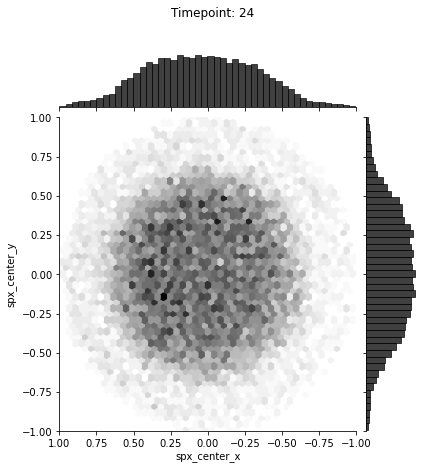

---


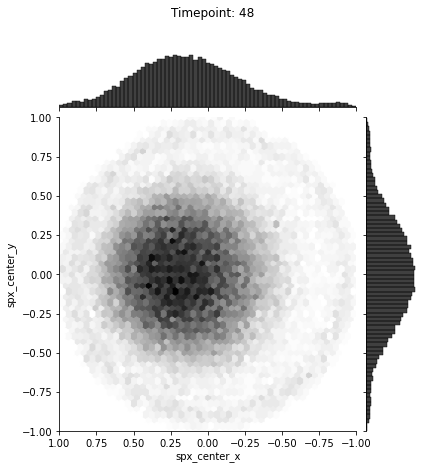

---


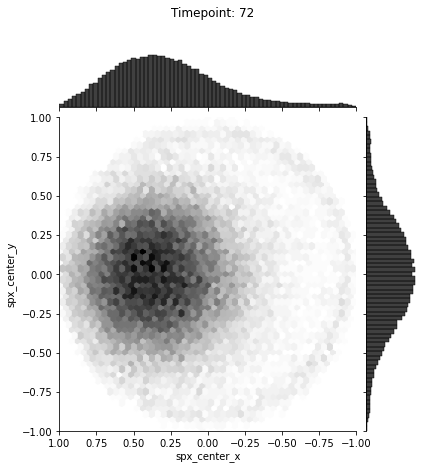

---


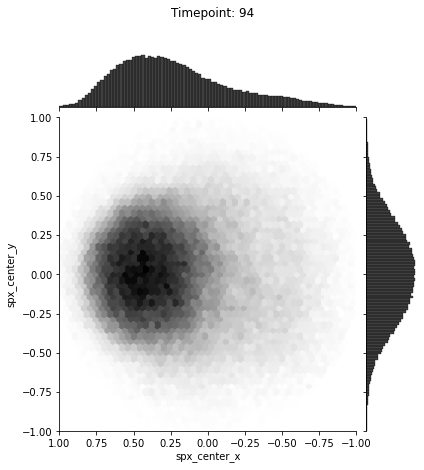

---


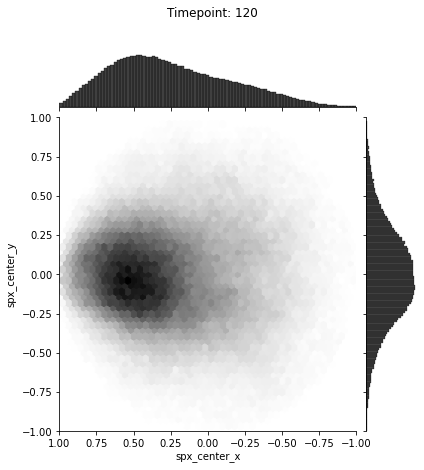

---


In [26]:
for timepoint, groupdf in apply_on_all(oriented_features.reset_index(), partial(select_topk, 
                                                                  col='spx_ch2_mean_norm',
                                                                  frac=FRAC)).groupby(['timepoint']):
    seaborn.jointplot(data=groupdf,  
                      x='spx_center_x', 
                      y='spx_center_y',
                      kind="hex", 
                      color="k",
                      ylim=(-1, 1),
                      xlim=(1, -1))  # This re-orients 0-angle centers to the left

    plt.suptitle('Timepoint: {}'.format(timepoint), y=1.08)
    plt.show()
    print('---')